# import the libraries for data preparation

In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split

In [5]:
data_path= 'Desktop/news.csv'

n_words = 200


In [6]:
def trim_string(x):

    x = x.split(maxsplit=n_words)
    x = ' '.join(x[:n_words])

    return x

# import the dataset

In [7]:
data = pd.read_csv(data_path)

In [9]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# prepare the columns

In [11]:
data['label'] =(data['label'] == 'FAKE').astype('int')
data['titletext'] = data['title']+ "."+data['text']
data = data.reindex(columns=['label', 'title', 'text', 'titletext'])


# drop the rows with empty text

In [12]:
data.drop( data[data.text.str.len() < 5].index, inplace=True)


# Trim text and titletext to n_word

In [14]:
data['text']=data['text'].apply(trim_string)
data['titletext']= data['titletext'].apply(trim_string)

# Split according to the label column

In [16]:
data_real = data[data['label'] == 0]
data_fake = data[data['label'] == 1]

# concatenate the splits of different labels

In [17]:
data = pd.concat([data_real, data_fake], ignore_index=True, sort=False)


# check the empty values

In [21]:
data.isna().sum()

label        0
title        0
text         0
titletext    0
dtype: int64

In [22]:
data.head()

,label,title,text,titletext
0,0,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,Kerry to go to Paris in gesture of sympathy.U....
1,0,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,The Battle of New York: Why This Primary Matte...
2,0,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,‘Britain’s Schindler’ Dies at 106.A Czech stoc...
3,0,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,Fact check: Trump and Clinton at the 'commande...
4,0,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,Iran reportedly makes new push for uranium con...


In [26]:
import numpy as np 
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt
import warnings

# Get the labels

In [27]:
text = data['titletext'].astype('U')
label = data['label'].astype('U')

# Split the dataset

In [28]:
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.25, random_state=7)


# Insert spliitted data into TfidfVectorizer and transform shape

In [30]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, lowercase=True)

transformed_text_train = vectorizer.fit_transform(text_train)
transformed_text_test = vectorizer.transform(text_test)

# Initialize Classifier

In [31]:
classifier = PassiveAggressiveClassifier(max_iter=100, warm_start=True)

classifier.fit(transformed_text_train, label_train)


predict = classifier.predict(transformed_text_test)

In [33]:
def plot_cmat(yte, ypred):
    skplt.plot_confusion_matrix(yte,ypred)
    plt.show()

# Get Accuracy Score

Accuracy Score: 92.13%

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       800
           1       0.92      0.92      0.92       775

    accuracy                           0.92      1575
   macro avg       0.92      0.92      0.92      1575
weighted avg       0.92      0.92      0.92      1575


Confusion Matrix


/Users/Epyon/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


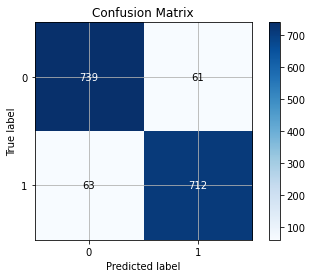

In [34]:
score = accuracy_score(label_test, predict)
print("Accuracy Score: %.2f%%" % (score*100))
print("\nClassification Report")
print(classification_report(label_test, predict))
print("\nConfusion Matrix")
plot_cmat(label_test, predict)